# Fund Raising Simulation

In [2]:
import random as rd
import statistics as st
import numpy.random as npr
import matplotlib.pyplot as plt

In [3]:
#input parameters
donors = 20
pranswer = 0.40
prdonate = 0.50
donationmean = 200.00
donationstd = 50.00

In [4]:
# user defined simulation function
# arguments: calls = number of phone calls, trials = number of simulation trials
# returns: list of simulated total donation amounts

def fundraisesim(calls, trials):
    sample = list()
    for i in range(trials):
        numberanswer = npr.binomial(calls,pranswer)
        numberdonate = npr.binomial(numberanswer, prdonate)
        totdonations = 0.0 
        for d in range(numberdonate):
            donations = rd.normalvariate(donationmean, donationstd)
            totdonations = totdonations + donations
        sample.append(totdonations)
    return(sample)

In [5]:
trials = 1000
sample = fundraisesim(donors, trials)
print('Mean = %5.2f' % st.mean(sample))
print('St.Dev. = %5.2f' % st.stdev(sample))

Mean = 795.70
St.Dev. = 375.67


(array([ 53., 131., 206., 220., 205.,  99.,  50.,  24.,   6.,   6.]),
 array([   0.        ,  220.72026256,  441.44052512,  662.16078769,
         882.88105025, 1103.60131281, 1324.32157537, 1545.04183793,
        1765.7621005 , 1986.48236306, 2207.20262562]),
 <BarContainer object of 10 artists>)

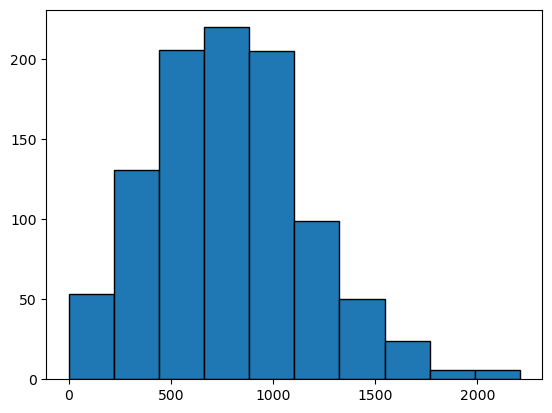

In [6]:
plt.hist(sample, edgecolor='k')

In [12]:
sample_mean = st.mean(sample)
sample_std = st.stdev(sample)
moe = 1.96*sample_std/len(sample)**0.5
lcl = sample_mean - moe
ucl = sample_mean + moe
print('The 95%% confidence interval for the mean of the total donations is (%6.2f, %6.2f)' % (lcl,ucl))

The 95% confidence interval for the mean of the total donations is (772.42, 818.99)


In [14]:
proportion = sum(1 for x in sample if x >= 1000)/len(sample)
print('There is a %5.2f%% chance of raising at least $1,000.' % (100*proportion))

There is a 26.80% chance of raising at least $1,000.


In [16]:
# 90% confidence interval for the proportion
moe = 1.645 * (proportion *(1-proportion)/len(sample))**0.5
lcl = proportion - moe
if lcl < 0.0: lcl = 0.0
ucl = proportion + moe
print('The 90%% confidence interval for the probability of raising at least $1,000 is (%6.4f, %6.4f).' % (lcl,ucl))

The 90% confidence interval for the probability of raising at least $1,000 is (0.2450, 0.2910).
